In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

In [3]:
salesData = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
print(salesData.columns)
salesData.head(3)

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08


In [4]:
salesData.crawl_month.value_counts()

2020-08    1573
Name: crawl_month, dtype: int64

In [5]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

# rating five count

## Check Five Star Null Ratings

In [6]:
salesData[salesData.rating_five_count.isnull()].head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
74,Fashion Women Sleeveless Lace Vest Loose V Nec...,Fashion Women Sleeveless Lace Vest Loose V Nec...,8.00,33,EUR,10,0,5.0,0,NaN,...,1496,4.169786,592955ef980a346d826f7bfc,0,NaN,https://www.wish.com/c/5ed0dfc51fa8446451b19c0d,https://contestimg.wish.com/api/webimage/5ed0d...,5ed0dfc51fa8446451b19c0d,summer,2020-08
112,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,EUR,10,0,5.0,0,NaN,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5eb90ab5ad67f63678d15ed9,https://contestimg.wish.com/api/webimage/5eb90...,5eb90ab5ad67f63678d15ed9,summer,2020-08
126,Women's Casual Sleeveless Stripe T Shirts Dres...,Women's Casual Sleeveless Stripe T Shirts Dres...,2.72,9,EUR,1,0,5.0,0,NaN,...,378,3.597884,5d417e7070327a2743021677,0,NaN,https://www.wish.com/c/5ed3ae8e7bf8821d5cf4bc64,https://contestimg.wish.com/api/webimage/5ed3a...,5ed3ae8e7bf8821d5cf4bc64,summer,2020-08
189,Jupe de tennis plissée extensible Active Skort...,Women's Active Skort Athletic Stretchy Pleated...,5.00,5,EUR,10,0,5.0,0,NaN,...,129,3.837209,5a3231f2e62bbc45b0bda1dd,0,NaN,https://www.wish.com/c/5ed1c059630f990d1d44592c,https://contestimg.wish.com/api/webimage/5ed1c...,5ed1c059630f990d1d44592c,summer,2020-08
216,Women's Sexy Push Up Bikini Sexy Vintage Set S...,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.00,30,EUR,10,0,5.0,0,NaN,...,22621,4.295124,56025ed8293a5b2d24779bde,0,NaN,https://www.wish.com/c/573db9316b335c34ca0513b8,https://contestimg.wish.com/api/webimage/573db...,573db9316b335c34ca0513b8,summer,2020-08


## Replace NA ratings with 0

In [7]:
salesData.rating_five_count = salesData.rating_five_count.replace(np.nan,0)

In [17]:
salesData.rating_four_count.fillna(0,inplace=True)
salesData.rating_three_count.fillna(0,inplace=True)
salesData.rating_two_count.fillna(0,inplace=True)
salesData.rating_one_count.fillna(0,inplace=True)

In [18]:
# salesData 看所有字段有没有空值
salesData.isnull().any()

title                           False
title_orig                      False
price                           False
retail_price                    False
currency_buyer                  False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
rating_five_count               False
rating_four_count               False
rating_three_count              False
rating_two_count                False
rating_one_count                False
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                    True
product_variation_size_id        True
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_to

# Urgency Banner

In [19]:
salesData[salesData.has_urgency_banner.isnull()].head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,EUR,10,0,5.00,1,1.0,...,65,3.507692,5e4b9c3801ba9d210036fc5a,0,NaN,https://www.wish.com/c/5ec645bafd107a02279c8c54,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,summer,2020-08
6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,EUR,50000,0,3.84,6742,3172.0,...,10194,4.076516,5652f4053a698c76dc9a3f37,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5c63a337d5e2ce4bbb3152cf,https://contestimg.wish.com/api/webimage/5c63a...,5c63a337d5e2ce4bbb3152cf,summer,2020-08
7,Robe tunique ample femme Robe d'été Robe en je...,Women's Baggy Tunic Dress Summer Dress Denim D...,12.00,11,EUR,1000,0,3.76,286,120.0,...,342,3.681287,5d45349676befe65691dcfbb,0,NaN,https://www.wish.com/c/5e0ae5ebc2efb76ccf0a3391,https://contestimg.wish.com/api/webimage/5e0ae...,5e0ae5ebc2efb76ccf0a3391,summer,2020-08
9,"Femmes d'été, plus la taille décontractée lâch...",Summer Women Plus Size Casual Loose V Neck Sho...,5.78,22,EUR,5000,0,3.60,687,287.0,...,5534,3.999819,5ba2251b4315d12ebce873fa,0,NaN,https://www.wish.com/c/5ccfaf238a8d535cec2dfb47,https://contestimg.wish.com/api/webimage/5ccfa...,5ccfaf238a8d535cec2dfb47,summer,2020-08


## Replace NA Urgency Banner with 0

In [20]:
salesData.has_urgency_banner.fillna(0,inplace=True)

# Origin Country

<AxesSubplot:xlabel='origin_country', ylabel='count'>

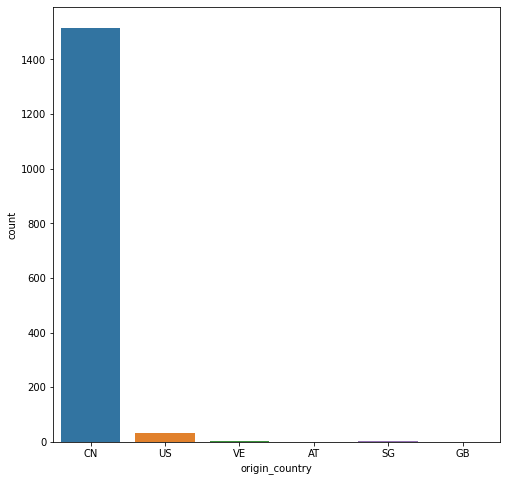

In [22]:
fig_dims = (8,8)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot('origin_country',data=salesData,ax=ax)

In [23]:
# China and US are the prominent countries. Since other countries have less contribution for the set, those items were replaced with 'Other'
salesData['origin_country'] = salesData['origin_country'].replace(np.nan, 'Other')
salesData['origin_country'] = salesData['origin_country'].replace('VE', 'Other')
salesData['origin_country'] = salesData['origin_country'].replace('SG', 'Other')
salesData['origin_country'] = salesData['origin_country'].replace('AT', 'Other')
salesData['origin_country'] = salesData['origin_country'].replace('GB', 'Other')

<AxesSubplot:xlabel='origin_country', ylabel='count'>

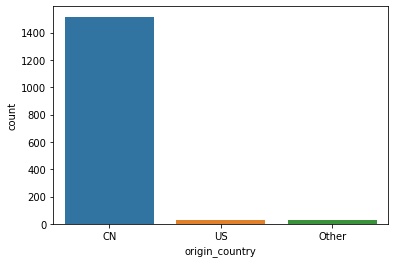

In [24]:
sns.countplot('origin_country',data=salesData)

In [25]:
salesData.isnull().any()

title                           False
title_orig                      False
price                           False
retail_price                    False
currency_buyer                  False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
rating_five_count               False
rating_four_count               False
rating_three_count              False
rating_two_count                False
rating_one_count                False
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                    True
product_variation_size_id        True
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_to

# Product Variation

In [26]:
pr_var = salesData.product_variation_size_id.value_counts()
pr_var[pr_var > 1]

S               641
XS              356
M               200
XXS             100
L                49
S.               18
XL               17
XXL              15
XXXS              6
XS.               5
4XL               5
s                 5
Size S            5
M.                4
SIZE XS           4
2XL               4
Size-XS           4
10 ml             3
33                3
Size-S            3
2pcs              3
SizeL             3
34                3
XXXXXL            2
S(bust 88cm)      2
size S            2
Size S.           2
One Size          2
25                2
1                 2
35                2
Suit-S            2
3XL               2
S Pink            2
EU 35             2
SIZE-XXS          2
Size M            2
XXXXL             2
Size -XXS         2
Size4XL           2
1 pc.             2
29                2
5XL               2
Name: product_variation_size_id, dtype: int64

In [27]:
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('S.', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('XS.', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('M.', 'M')

salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size S', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size-XS', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('SIZE XS', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size-S', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size4XL', 'XL')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('size S', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size M', 'M')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size -XXS', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('SIZE-XXS', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('Size S.', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('s', 'S')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('SizeL', 'L')

salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('5XL', 'XL')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('4XL', 'XL')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('3XL', 'XL')
salesData['product_variation_size_id'] = salesData['product_variation_size_id'].replace('2XL', 'XL')

In [28]:
pr_var = salesData['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S               693
XS              356
M               206
XXS             100
L                52
XL               32
XXL              15
XXXS              6
2pcs              3
33                3
34                3
10 ml             3
25                2
1 pc.             2
29                2
S Pink            2
S(bust 88cm)      2
EU 35             2
One Size          2
1                 2
XXXXXL            2
35                2
XXXXL             2
Suit-S            2
Name: product_variation_size_id, dtype: int64

In [29]:
def pr_var(name): # 自定义方法清洗数据
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL':
        return name
    else:
        return "OTHER"
    
salesData.product_variation_size_id.fillna('Other',inplace=True)
salesData.product_variation_size_id = salesData.product_variation_size_id.apply(pr_var)

In [30]:
pr_var = salesData['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S         693
XS        356
M         206
OTHER     109
XXS       100
L          52
XL         32
XXL        15
XXXS        6
XXXXL       2
XXXXXL      2
Name: product_variation_size_id, dtype: int64

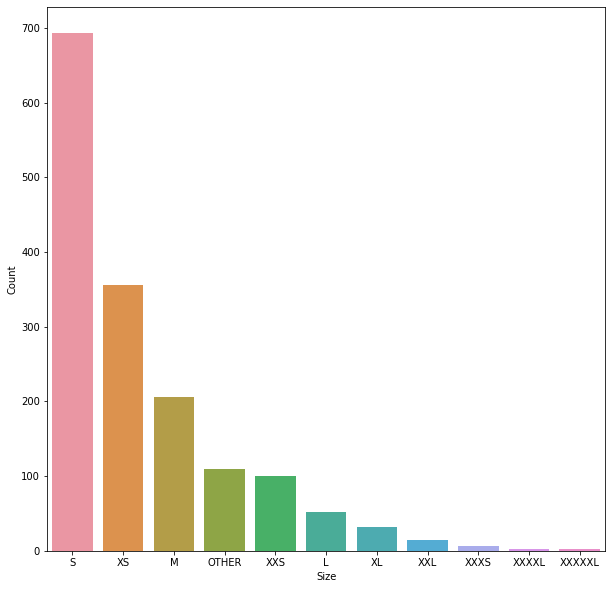

In [32]:
fig_dims = (10,10)
fig,ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = salesData.product_variation_size_id.value_counts().index,
              data = salesData,
              ax=ax
             )
ax.set(xlabel='Size',ylabel="Count")
plt.show()

In [33]:
salesData.isnull().any()

title                           False
title_orig                      False
price                           False
retail_price                    False
currency_buyer                  False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
rating_five_count               False
rating_four_count               False
rating_three_count              False
rating_two_count                False
rating_one_count                False
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                    True
product_variation_size_id       False
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_to

# Product Color

In [34]:
pr_colr = salesData['product_color'].value_counts()
pr_colr[pr_colr > 2]

black               302
white               254
yellow              105
blue                 99
pink                 99
red                  93
green                90
grey                 71
purple               53
armygreen            31
navyblue             28
winered              28
orange               27
multicolor           20
beige                14
khaki                12
lightblue            12
gray                 11
white & green        10
skyblue               8
rosered               8
coffee                7
brown                 7
darkblue              6
rose                  5
floral                5
black & green         4
fluorescentgreen      4
leopard               4
lightpink             4
navy                  4
black & white         3
White                 3
Black                 3
orange-red            3
camouflage            3
lightgreen            3
Name: product_color, dtype: int64

In [35]:
salesData['product_color'] = salesData['product_color'].replace('Black', 'black')
salesData['product_color'] = salesData['product_color'].replace('White', 'white')

salesData['product_color'] = salesData['product_color'].replace('navyblue', 'blue')
salesData['product_color'] = salesData['product_color'].replace('lightblue', 'blue')
salesData['product_color'] = salesData['product_color'].replace('skyblue', 'blue')
salesData['product_color'] = salesData['product_color'].replace('darkblue', 'blue')
salesData['product_color'] = salesData['product_color'].replace('navy', 'blue')

salesData['product_color'] = salesData['product_color'].replace('winered', 'red')
salesData['product_color'] = salesData['product_color'].replace('rosered', 'red')
salesData['product_color'] = salesData['product_color'].replace('rose', 'red')
salesData['product_color'] = salesData['product_color'].replace('orange-red', 'red')

salesData['product_color'] = salesData['product_color'].replace('lightpink', 'pink')

salesData['product_color'] = salesData['product_color'].replace('armygreen', 'green')
salesData['product_color'] = salesData['product_color'].replace('khaki', 'green')
salesData['product_color'] = salesData['product_color'].replace('lightgreen', 'green')
salesData['product_color'] = salesData['product_color'].replace('fluorescentgreen', 'green')

salesData['product_color'] = salesData['product_color'].replace('gray', 'grey')

salesData['product_color'] = salesData['product_color'].replace('coffee', 'brown')

salesData['product_color'] = salesData['product_color'].replace('multicolor', 'other')
salesData['product_color'] = salesData['product_color'].replace('floral', 'other')
salesData['product_color'] = salesData['product_color'].replace('leopard', 'other')
salesData['product_color'] = salesData['product_color'].replace('camouflage', 'other')

salesData['product_color'] = salesData['product_color'].replace('white & green', 'dual')
salesData['product_color'] = salesData['product_color'].replace('black & green', 'dual')
salesData['product_color'] = salesData['product_color'].replace('black & white', 'dual')
salesData['product_color'] = salesData['product_color'].replace('camouflage', 'other')
    
salesData['product_color'] = salesData['product_color'].replace(np.nan, 'other')

pr_colr = salesData['product_color'].value_counts()
pr_colr[pr_colr > 2]

black     305
white     257
blue      157
green     140
red       137
yellow    105
pink      103
grey       82
other      73
purple     53
orange     27
dual       17
brown      14
beige      14
Name: product_color, dtype: int64

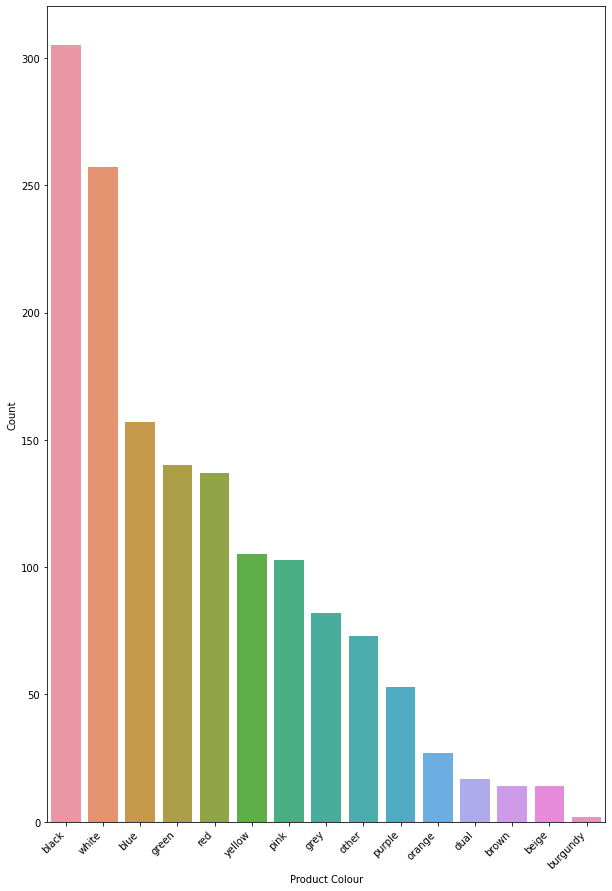

In [36]:
# Show Most popular colors
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_color',
              data = salesData,
              order = salesData['product_color'].value_counts().iloc[:15].index,
              ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
salesData['product_color'] = salesData['product_color'].replace(np.nan, 'other')
salesData.isnull().any()

title                           False
title_orig                      False
price                           False
retail_price                    False
currency_buyer                  False
units_sold                      False
uses_ad_boosts                  False
rating                          False
rating_count                    False
rating_five_count               False
rating_four_count               False
rating_three_count              False
rating_two_count                False
rating_one_count                False
badges_count                    False
badge_local_product             False
badge_product_quality           False
badge_fast_shipping             False
tags                            False
product_color                   False
product_variation_size_id       False
product_variation_inventory     False
shipping_option_name            False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_to

# Units Sold

In [38]:
pr_unit = salesData['units_sold'].value_counts()
pr_unit

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64

In [40]:
def pr_units(item):
    if item == 10 \
    or item == 50 \
    or item == 100 \
    or item == 1000 \
    or item == 5000 \
    or item == 10000 \
    or item == 20000 \
    or item == 50000 \
    or item == 100000:
        return item
    else:
        return 10
    
salesData['units_sold'] = salesData['units_sold'].apply(pr_units)
pr_unit = salesData['units_sold'].value_counts()
pr_unit

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: units_sold, dtype: int64

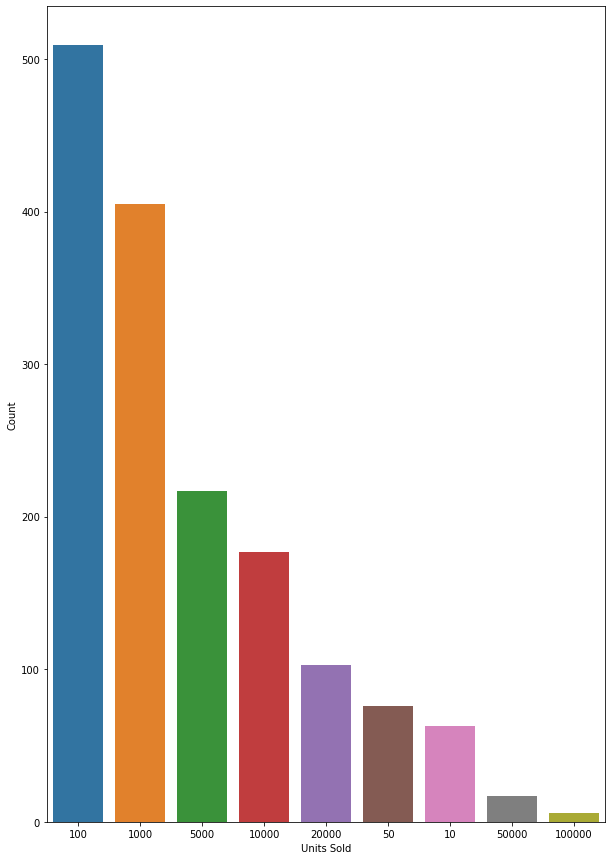

In [41]:
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('units_sold',
              data = salesData,
              order = salesData['units_sold'].value_counts().index,
              ax = ax)
ax.set(xlabel='Units Sold', ylabel='Count')
plt.show()

In [42]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1573 non-null   float64
 10  rating_four_count             1573 non-null   float64
 11  rating_three_count            1573 non-null   float64
 12  rating_two_count              1573 non-null   float64
 13  rat

# Popular product

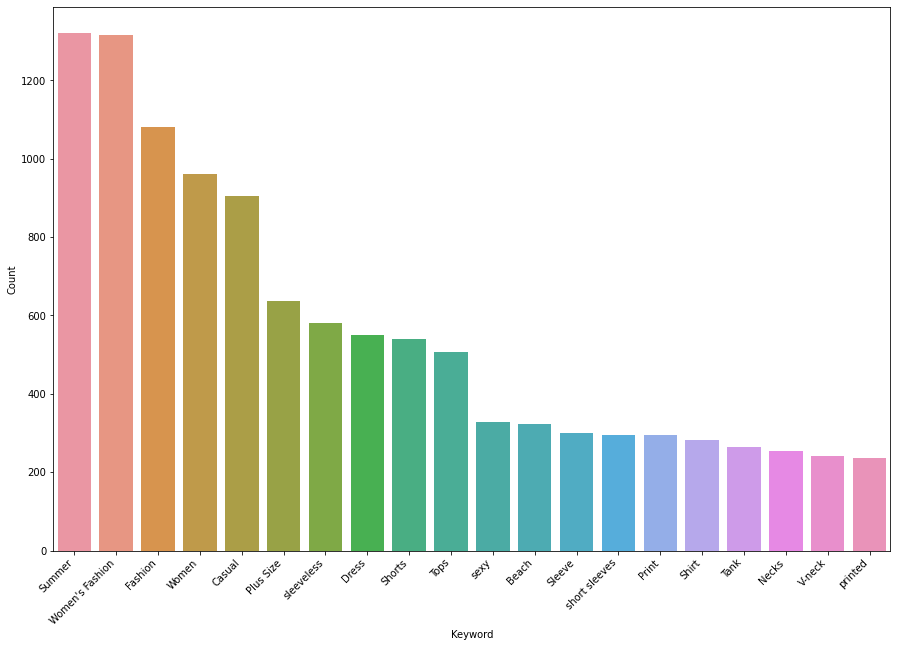

In [43]:
cate_data = pd.read_csv("unique-categories.sorted-by-count.csv")


fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'keyword',
            y = 'count',
            data = cate_data.iloc[:20],
            ax = ax)
ax.set(xlabel='Keyword', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Now let's create a column which indicates how many popular tags contain on a specific product tag

In [49]:
cate_data.iloc[:10]

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual
5,636,Plus Size
6,580,sleeveless
7,549,Dress
8,540,Shorts
9,507,Tops


In [44]:
pop_tags = cate_data.iloc[:10]['keyword'].tolist()

def check_tag_quality(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    
    common_elements = np.intersect1d(pop_tags,prod_tags) # 交集
    return len(common_elements) / len(pop_tags)

salesData['tag_quality'] = salesData.tags.apply(check_tag_quality)

In [50]:
# check the number of tags include in the product
def tag_count(tags):
    tag_str = tags
    prod_tags = tag_str.split(",")
    return len(prod_tags)

# 使用lambda表达式 更方便
salesData['tag_count'] = salesData.tags.apply(lambda x:len(x.split(",")))

In [52]:
def is_localised(trans,origi):
    if trans == origi:
        return 0
    else:
        return 1
    
salesData['title_localised'] = salesData.apply(lambda x:is_localised(x.title,x.title_orig),axis=1)

In [56]:
def check_name(title,name):
    title = str(title).replace(" ", "")
    title = title.replace(".", "")
    
    name = str(name).replace(" ", "")
    name = name.replace(".", "")
    
    if title.lower() == name.lower():
        return 1
    else:
        return 0
    
salesData['com_same_name'] = salesData.apply(lambda x: check_name(x.merchant_title, x.merchant_name), axis = 1)

In [58]:
# check whether the merchant subtitle contains positive ratings
def inc_positive_per(wordset):
    pos_ses = 'avis positifs'
    if f'{pos_ses}' in f'{wordset}':
        return 1
    else:
        return 0
    
    
salesData['subtitle_rating'] = salesData['merchant_info_subtitle'].apply(inc_positive_per)

In [61]:
def check_rating_prop(s_count,t_count):
    if s_count == 0:
        return 0
    else:
        return s_count/t_count
    
salesData['rating_five_count'] = salesData.apply(lambda x: check_rating_prop(x.rating_five_count, x.rating_count), 
                                             axis = 1)
salesData['rating_four_count'] = salesData.apply(lambda x: check_rating_prop(x.rating_four_count, x.rating_count), 
                                             axis = 1)
salesData['rating_three_count'] = salesData.apply(lambda x: check_rating_prop(x.rating_three_count, x.rating_count), 
                                             axis = 1)
salesData['rating_two_count'] = salesData.apply(lambda x: check_rating_prop(x.rating_two_count, x.rating_count), 
                                             axis = 1)
salesData['rating_one_count'] = salesData.apply(lambda x: check_rating_prop(x.rating_one_count, x.rating_count), 
                                             axis = 1)

In [62]:
def check_dis_per(r_price,buyer_price):
    return (r_price - buyer_price) / r_price
    
salesData['discount_rate'] = salesData.apply(lambda x: check_dis_per(x.retail_price, x.price),
                                             axis = 1)

0      -0.142857
1       0.636364
2       0.813953
3       0.000000
4       0.093333
          ...   
1568    0.333333
1569    0.964286
1570    0.736842
1571   -0.181818
1572   -0.166667
Name: discount_rate, Length: 1573, dtype: float64

In [64]:
def merchant_pop_on_prod(m_count,p_count):
    if m_count == 0:
        return 0
    else:
        return p_count / m_count
    
salesData['merch_pop_proc'] = salesData.apply(lambda x: merchant_pop_on_prod(x.merchant_rating_count, x.rating_count),
                                              axis = 1)

# Correlation Heat Map

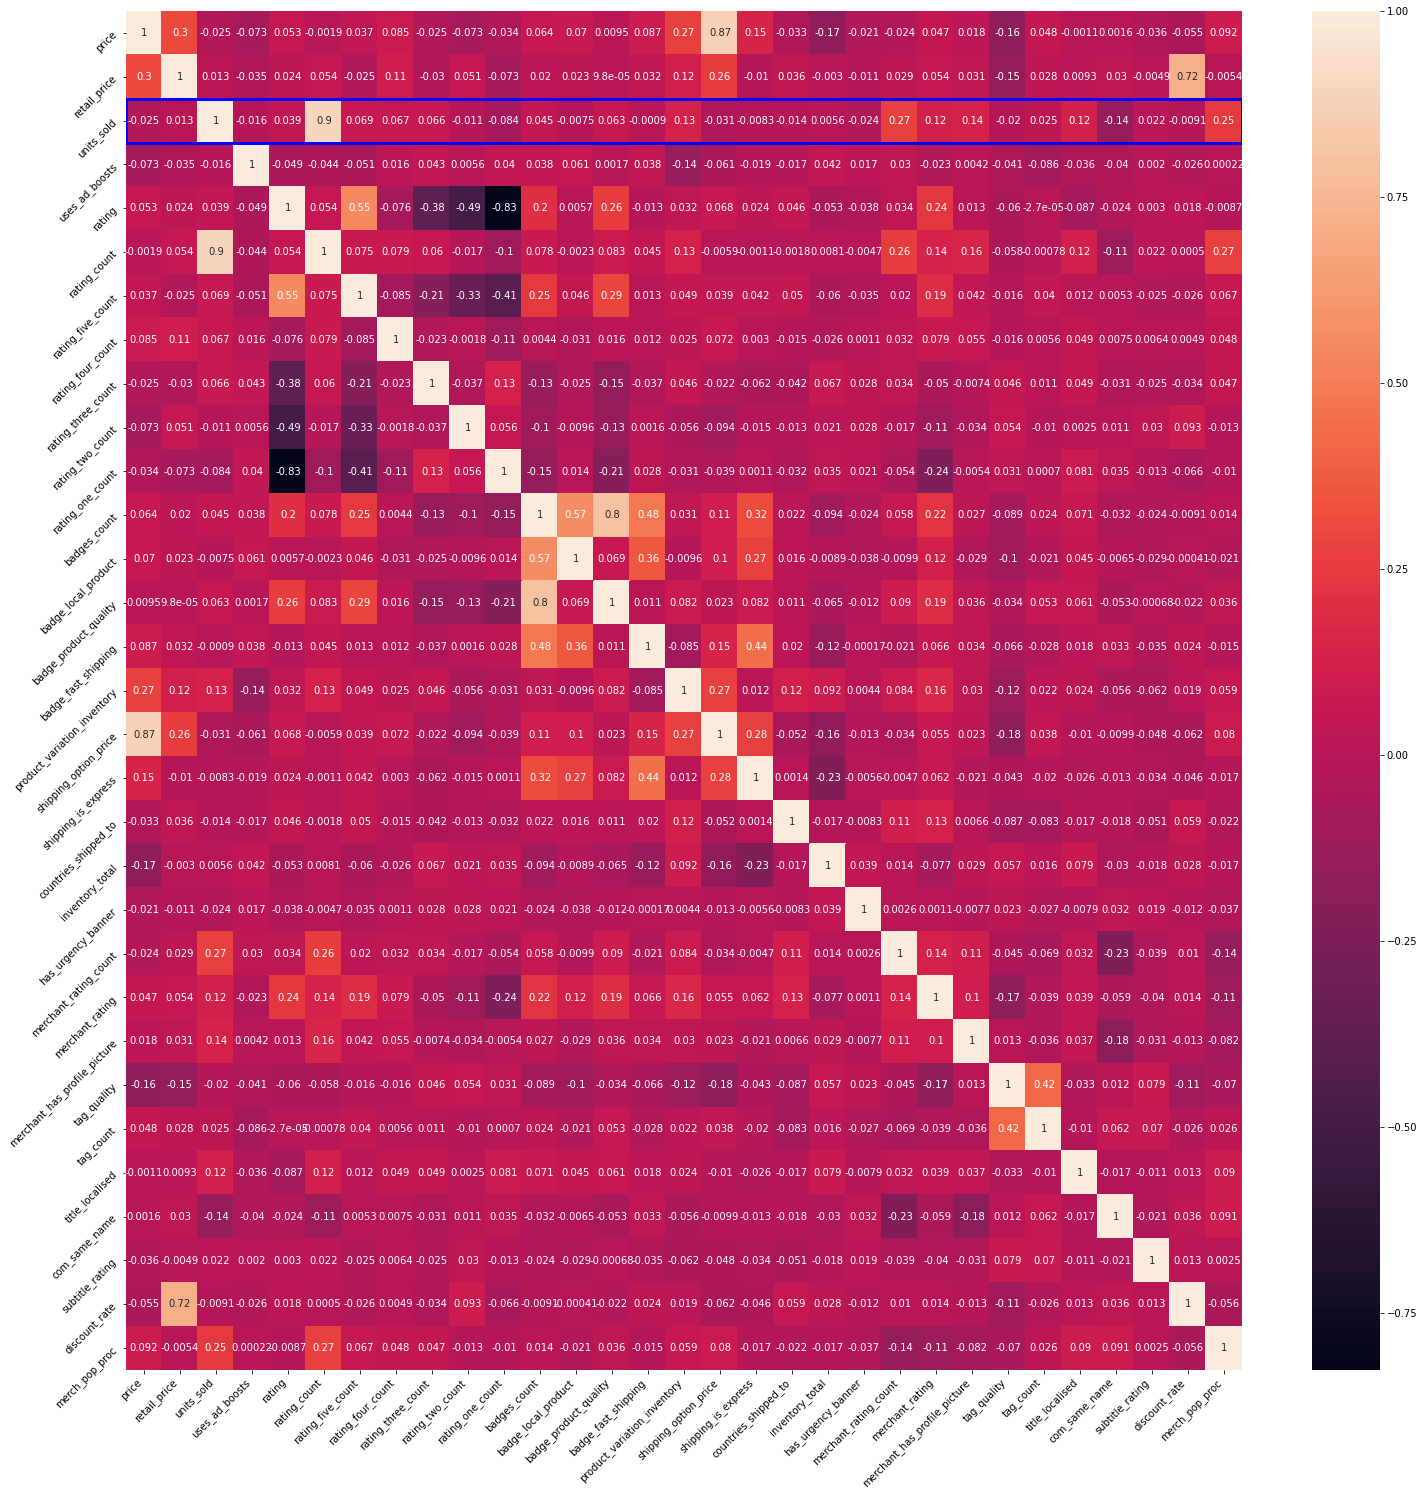

In [65]:
fig_dims = (25,25)
fig,ax = plt.subplots(figsize=fig_dims)
sns.heatmap(salesData.corr(),annot=True,ax=ax)

ax.add_patch(plt.Rectangle((0,2),31,1, 
                           fill = False, 
                           edgecolor = 'blue', 
                           lw = 3))
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

# Remove Unwanted Columns

In [67]:
salesData = salesData.drop(['crawl_month','product_id','product_picture', 'product_url', 'merchant_profile_picture', 'merchant_id', 'currency_buyer'], axis = 1)
salesData = salesData.drop(['theme','urgency_text', 'merchant_title', 'merchant_name', 'merchant_info_subtitle'], axis = 1)
salesData = salesData.drop(['title','title_orig','tags'], axis = 1)
salesData = salesData.drop(['shipping_option_name'], axis = 1)
salesData = salesData.drop(['rating_count'], axis = 1)

In [68]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   units_sold                    1573 non-null   int64  
 3   uses_ad_boosts                1573 non-null   int64  
 4   rating                        1573 non-null   float64
 5   rating_five_count             1573 non-null   float64
 6   rating_four_count             1573 non-null   float64
 7   rating_three_count            1573 non-null   float64
 8   rating_two_count              1573 non-null   float64
 9   rating_one_count              1573 non-null   float64
 10  badges_count                  1573 non-null   int64  
 11  badge_local_product           1573 non-null   int64  
 12  badge_product_quality         1573 non-null   int64  
 13  bad

# Create Model to predict Units Sold

In [69]:
'''
data : array-like, Series, or DataFrame
输入的数据
prefix : string, list of strings, or dict of strings, default None
get_dummies转换后，列名的前缀
columns : list-like, default None
指定需要实现类别转换的列名
dummy_na : bool, default False
增加一列表示空缺值，如果False就忽略空缺值
drop_first : bool, default False
获得k中的k-1个类别值，去除第一个
'''

salesData = pd.get_dummies(
    salesData,columns=['product_color'],
    prefix='color_',
    drop_first=True) # 利用pandas实现one hot encode  通过product_color展开
salesData.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,...,color__watermelonred,color__white,color__white & black,color__white & red,color__whitefloral,color__whitestripe,color__wine,color__wine red,color__winered & yellow,color__yellow
0,16.00,14,100,0,3.76,0.481481,0.148148,0.185185,0.018519,0.166667,...,0,1,0,0,0,0,0,0,0,0
1,8.00,22,20000,1,3.45,0.369845,0.167400,0.182233,0.104971,0.175550,...,0,0,0,0,0,0,0,0,0,0
2,8.00,43,100,0,3.57,0.357143,0.285714,0.142857,0.000000,0.214286,...,0,0,0,0,0,0,0,0,0,0
3,8.00,8,5000,1,4.03,0.509499,0.205527,0.150259,0.072539,0.062176,...,0,0,0,0,0,0,0,0,0,0
4,2.72,3,100,1,3.10,0.300000,0.200000,0.100000,0.100000,0.300000,...,0,0,0,0,0,0,0,0,0,1


In [73]:
salesData = pd.get_dummies(salesData, 
                           columns = ['product_variation_size_id'],
                           prefix = 'size_',
                           drop_first = True)
salesData.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,...,size__M,size__OTHER,size__S,size__XL,size__XS,size__XXL,size__XXS,size__XXXS,size__XXXXL,size__XXXXXL
0,16.00,14,100,0,3.76,0.481481,0.148148,0.185185,0.018519,0.166667,...,1,0,0,0,0,0,0,0,0,0
1,8.00,22,20000,1,3.45,0.369845,0.167400,0.182233,0.104971,0.175550,...,0,0,0,0,1,0,0,0,0,0
2,8.00,43,100,0,3.57,0.357143,0.285714,0.142857,0.000000,0.214286,...,0,0,0,0,1,0,0,0,0,0
3,8.00,8,5000,1,4.03,0.509499,0.205527,0.150259,0.072539,0.062176,...,1,0,0,0,0,0,0,0,0,0
4,2.72,3,100,1,3.10,0.300000,0.200000,0.100000,0.100000,0.300000,...,0,0,1,0,0,0,0,0,0,0


In [74]:
salesData = pd.get_dummies(salesData, 
                           columns = ['origin_country'],
                           prefix = 'country_',
                           drop_first = True)
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Columns: 119 entries, price to country__US
dtypes: float64(12), int64(18), uint8(89)
memory usage: 505.5 KB


In [75]:
from sklearn.model_selection import train_test_split

r_state = 3
X = salesData.drop(['units_sold'], axis = 1)
y = salesData['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = r_state)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

classifier_DTC = DecisionTreeClassifier(random_state = r_state)
classifier_DTC.fit(X_train, y_train)

y_pred_DTC = classifier_DTC.predict(X_test)
accuracy_score(y_test, y_pred_DTC)

0.6952380952380952

In [79]:
from sklearn.svm import SVC

classifier_SVC = SVC(random_state = r_state)
classifier_SVC.fit(X_train, y_train)

y_pred_SVC = classifier_SVC.predict(X_test)
accuracy_score(y_test, y_pred_SVC)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4

In [80]:
from sklearn.ensemble import AdaBoostClassifier

classifier_ABC = AdaBoostClassifier(learning_rate = 0.01,
                                   random_state = r_state) # Default using Decision Tree Classifier
classifier_ABC.fit(X_train, y_train)

y_pred_ABC = classifier_ABC.predict(X_test)
accuracy_score(y_test, y_pred_ABC)

0.3238095238095238

In [81]:
from sklearn.ensemble import RandomForestClassifier

classifier_RFC = RandomForestClassifier(random_state = r_state)
classifier_RFC.fit(X_train, y_train)

y_pred_RFC = classifier_RFC.predict(X_test)
accuracy_score(y_test, y_pred_RFC)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5587301587301587

In [82]:
classifier_ABC_RF = AdaBoostClassifier(RandomForestClassifier(random_state = r_state),
                                       learning_rate = 0.01,
                                       random_state = r_state) 
classifier_ABC_RF.fit(X_train, y_train)

y_pred_ABC_RF = classifier_ABC_RF.predict(X_test)
accuracy_score(y_test, y_pred_ABC_RF)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

0.6666666666666666

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_GBC = GradientBoostingClassifier(random_state = r_state)
classifier_GBC.fit(X_train, y_train)

y_pred_GBC = classifier_GBC.predict(X_test)
accuracy_score(y_test, y_pred_GBC)

0.726984126984127

In [84]:
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier(n_neighbors = 5)
classifier_KNN.fit(X_train, y_train)

y_pred_KNN = classifier_KNN.predict(X_test)
accuracy_score(y_test, y_pred_KNN)

0.29523809523809524

In [87]:
from sklearn.model_selection import cross_val_score

classifiers = [classifier_DTC, 
               classifier_SVC,
               classifier_ABC, 
               classifier_RFC, 
               classifier_ABC_RF, 
               classifier_GBC, 
               classifier_KNN, 
               ]
classifiers_names = ['Decision Tree',
                     'SVC', 
                     'AdaBoost',
                     'Random Forest',
                     'AdaBoost - Random Forest',
                     'Gradient Boosting',
                     'KNeighborsClassifier',
                     ]
accuracy_mean = []

for cl in classifiers :
    accuracies = cross_val_score(estimator = cl, 
                                 X = X_train, 
                                 y = y_train, 
                                 cv = 4)
    accuracy_mean.append(accuracies.mean()*100)

    
accuracy_df = pd.DataFrame({'Classifier': classifiers_names,
                           'Accuracy Mean': accuracy_mean})
accuracy_df.sort_values('Accuracy Mean',ascending=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

,Classifier,Accuracy Mean
5,Gradient Boosting,68.198007
0,Decision Tree,63.742977
4,AdaBoost - Random Forest,62.243301
3,Random Forest,54.693896
1,SVC,43.247837
6,KNeighborsClassifier,34.419371
2,AdaBoost,29.673995


In [88]:
from sklearn.ensemble import VotingClassifier

voting_cl = VotingClassifier(estimators = [('Gradient Boosting', classifier_GBC),
                                              ('Decision Tree',classifier_RFC),
                                              ], 
                                voting = 'hard')
voting_cl.fit(X_train, y_train)
y_pred_vcl = voting_cl.predict(X_test)
accuracy_score(y_test, y_pred_vcl)

0.6317460317460317

In [89]:
from sklearn.utils import class_weight

# Calculate class weights
class_weights_set = class_weight.compute_class_weight('balanced',
                                                      np.unique(y_train),
                                                      y_train)

# Print the class weights
# class_weights_set

class_weights_set = dict(zip(np.unique(y_train), class_weights_set))
class_weights_set

{10: 2.6880341880341883,
 50: 2.29143897996357,
 100: 0.3376274825550188,
 1000: 0.4327485380116959,
 5000: 0.7852684144818977,
 10000: 1.067005937234945,
 20000: 1.6840696117804552,
 50000: 11.648148148148149,
 100000: 34.94444444444444}

In [90]:
# Best Model for the Wish Summer Sale is Gradient Boosting Classifier

optimised_GBC = GradientBoostingClassifier(random_state = r_state,
                                       loss = 'deviance',
                                       learning_rate = 0.1,
                                       n_estimators = 100)
optimised_GBC.fit(X_train, y_train)
y_pred_GBC = optimised_GBC.predict(X_test)
accuracy_score(y_test, y_pred_GBC)

0.726984126984127